In [1]:
import pandas_datareader as pdr

In [2]:
# reading data

df = pdr.get_data_yahoo("zomato.ns")

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-23,138.899994,115.000000,116.000000,126.000000,694895290,126.000000
2021-07-26,143.750000,125.300003,126.349998,140.649994,249723854,140.649994
2021-07-27,147.800003,127.750000,141.699997,132.899994,240341900,132.899994
2021-07-28,135.000000,123.550003,131.000000,131.199997,159793731,131.199997
2021-07-29,144.000000,132.199997,134.949997,141.550003,117973089,141.550003


In [4]:
df.shape

(260, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2021-07-23 to 2022-08-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       260 non-null    float64
 1   Low        260 non-null    float64
 2   Open       260 non-null    float64
 3   Close      260 non-null    float64
 4   Volume     260 non-null    int64  
 5   Adj Close  260 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 14.2 KB


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

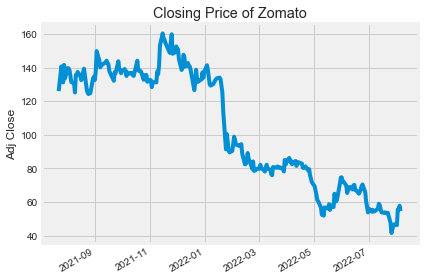

In [7]:
# Let's see a historical view of the closing price

df['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)    
plt.title("Closing Price of Zomato")
plt.tight_layout()

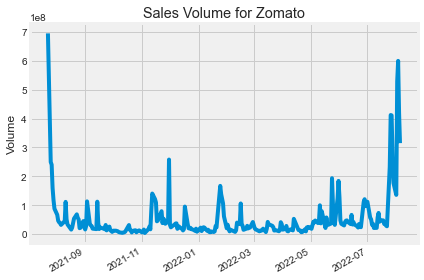

In [8]:
# Now let's plot the total volume of stock being traded each day

df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Sales Volume for Zomato")
    
plt.tight_layout()

In [9]:
# the moving average of the Zomato stocks

ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Adj Close'].rolling(ma).mean()

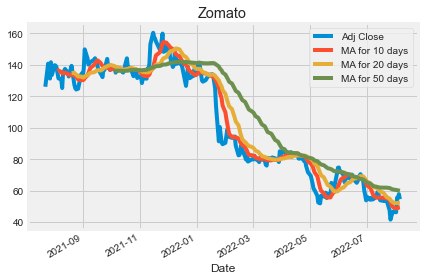

In [10]:
df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title('Zomato')

plt.tight_layout()

Text(0.5, 1.0, 'Zomato')

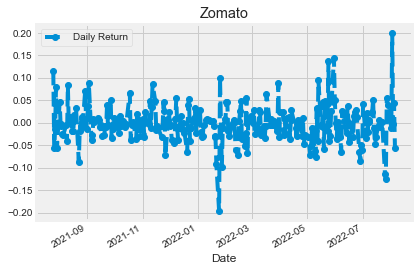

In [11]:
# the daily return of the stock on average

df['Daily Return'] = df['Adj Close'].pct_change()


df['Daily Return'].plot(legend=True, linestyle='--', marker='o')
plt.title('Zomato')

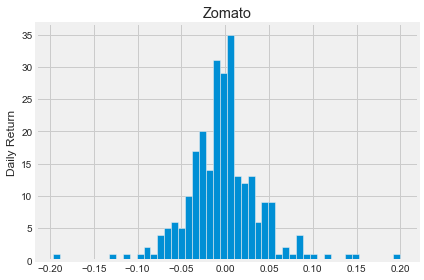

In [12]:
# let's get an overall look at the average daily return using a histogram. 
# We'll use seaborn to create both a histogram and kde plot on the same figure.


df['Daily Return'].hist(bins=50)
plt.ylabel('Daily Return')
plt.title('Zomato')
    
plt.tight_layout()

## Predicting the closing price stock price of Zomato

In [13]:
from pandas_datareader.data import DataReader
from datetime import datetime

data = DataReader('ZOMATO.ns', data_source='yahoo', start='2012-01-01', end=datetime.now())

In [14]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-23,138.899994,115.000000,116.000000,126.000000,694895290,126.000000
2021-07-26,143.750000,125.300003,126.349998,140.649994,249723854,140.649994
2021-07-27,147.800003,127.750000,141.699997,132.899994,240341900,132.899994
2021-07-28,135.000000,123.550003,131.000000,131.199997,159793731,131.199997
2021-07-29,144.000000,132.199997,134.949997,141.550003,117973089,141.550003
...,...,...,...,...,...,...
2022-08-01,47.250000,45.049999,46.799999,46.299999,135944043,46.299999
2022-08-02,55.549999,48.400002,50.000000,55.549999,528899748,55.549999
2022-08-03,56.900002,51.750000,52.500000,55.450001,599688336,55.450001


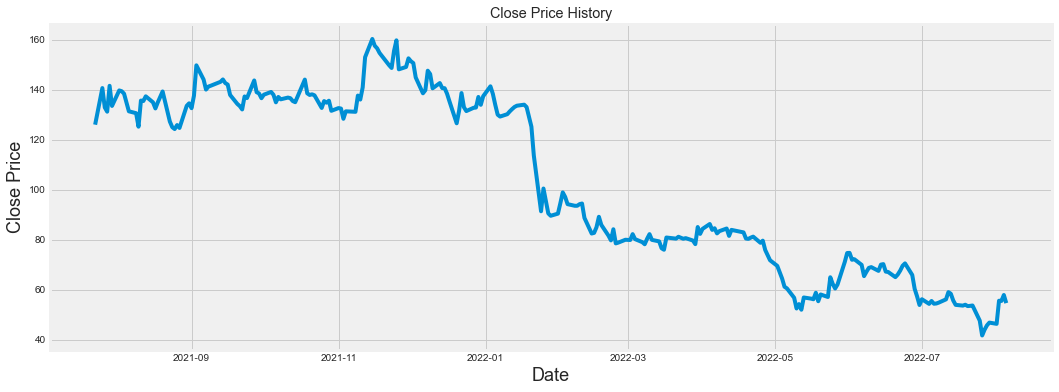

In [15]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

X = data.drop('Close',axis = 1)
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 355)

In [17]:
# preprocessing training data with minmaxscaler 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
prepared_data = scaler.fit_transform(X_train)

prepared_data

array([[0.34189405, 0.35291522, 0.3836243 , 0.04480026, 0.34386848],
       [0.72150885, 0.80742048, 0.77098929, 0.0030377 , 0.76696158],
       [0.71910112, 0.80432855, 0.77182047, 0.01023237, 0.76864731],
       ...,
       [0.76083464, 0.82243812, 0.81379888, 0.00852116, 0.78634635],
       [0.38603531, 0.4333039 , 0.41978389, 0.0233094 , 0.41087231],
       [0.0224719 , 0.034894  , 0.03948462, 0.25056136, 0.04340495]])

In [18]:
# fit model on training data

from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(prepared_data, y_train)

SVR(kernel='linear')

In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse

prepared_test_data = scaler.fit_transform(X_test)
svr_predictions = svr.predict(prepared_test_data)

svr_RMSE = np.sqrt(mse(y_test,svr_predictions))
svr_RMSE

5.209687459189125